In [43]:
import numpy as np                                                 
import pandas as pd                                                
#import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [2]:
titanic_data = pd.read_csv("titanic_train.csv")     # Importing training dataset

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data['Embarked'].isna().sum()

2

In [5]:
titanic_data['Age'].isna().sum()

177

In [6]:
titanic_data['Fare'].isna().sum()

0

In [7]:
titanic_data['Cabin'].isna().sum()

687

# Preprocessing the data

In [8]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [9]:
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)

In [10]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [11]:
#Creating a new feature named FamilySize.

In [12]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [14]:
#Segmenting Sex column as per Age, Age less than 15 as Child, Age greater than 15 as Males and Females as per their gender.

In [15]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [16]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [17]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [18]:
titanic_data['GenderClass'].value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

# Dummification of GenderClass & Embarked.

In [19]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,1,0,1


In [21]:
#Dropping columns 'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'

In [22]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


In [23]:
#Drawing pair plot to know the joint relationship between 'Fare' , 'Age' , 'Pclass' & 'Survived'

Text(0.5, 1.0, 'Pair Plot')

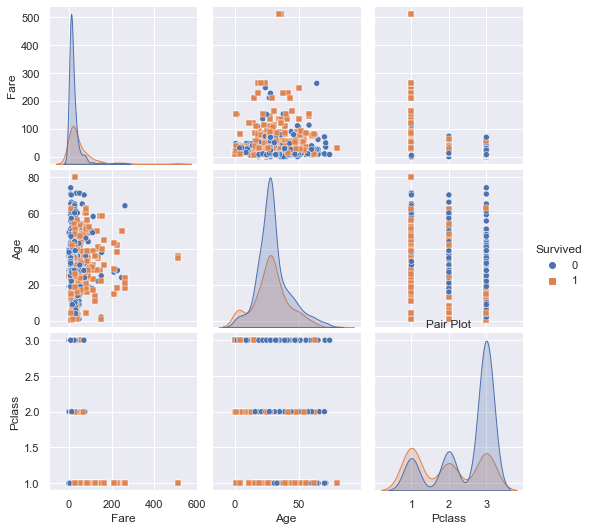

In [24]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,

More people of Pclass 1 survived than died (First peak of red is higher than blue)
More people of Pclass 3 died than survived (Third peak of blue is higher than red)
More people of age group 20-40 died than survived.
Most of the people paying less fare died.
Establishing coorelation between all the features using heatmap.

Text(0.5, 1.0, 'Correlation between features')

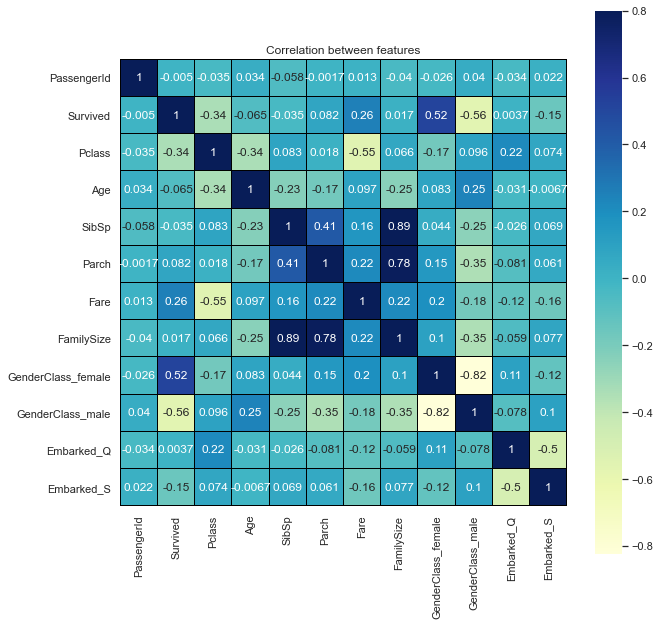

In [25]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Age and Pclass are negatively corelated with Survived.
FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
Fare and FamilySize are positively coorelated with Survived.
With high corelation we face redundancy issues.

# Preparing X and y using pandas

In [26]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [27]:
y = titanic.Survived 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
X.shape

(891, 9)

# Splitting X and y into training and test datasets.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(179, 9)
(179,)


# Logistic regression in scikit-learn

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

# Using the Model for Prediction

In [35]:
y_pred_train = logreg.predict(X_train)  

In [36]:
y_pred_test = logreg.predict(X_test)    

# Model Evaluation using accuracy classification score

In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8044692737430168


# Model Evaluation using confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  97   9
1  26  47


In [39]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  97                   9
Actual Survived              26                  47


This means 93 + 48 = 141 correct predictions & 25 + 13 = 38 false predictions.

Adjusting Threshold for predicting Died or Survived.

In the section 4.7 we have used, .predict method for classification. This method takes 0.5 as the default threshhod for prediction.
Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model.
For this we are going to use .predict_proba method instead of using .predict method.



Setting the threshold to 0.75

In [40]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7374301675977654


The accuracy have been reduced significantly changing from 0.79 to 0.73. Hence, 0.75 is not a good threshold for our model.

Setting the threshold to 0.25

In [41]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7653631284916201


The accuracy have been reduced, changing from 0.79 to 0.75. Hence, 0.25 is also not a good threshold for our model.
Later on we will see methods to identify the best threshold.